In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[129.   150.25 116.5 ]
   [122.5  143.5  110.5 ]
   [126.25 147.25 114.25]
   ...
   [187.25 178.25 173.25]
   [189.75 180.75 175.75]
   [191.75 182.75 177.75]]

  [[140.5  162.5  124.75]
   [144.5  166.5  129.5 ]
   [136.   158.   121.5 ]
   ...
   [188.5  179.5  174.5 ]
   [190.5  181.5  176.5 ]
   [187.25 178.25 173.25]]

  [[128.5  151.25 110.  ]
   [132.25 154.75 114.25]
   [143.   165.   126.75]
   ...
   [194.   185.   180.  ]
   [194.5  185.5  180.5 ]
   [188.   179.   174.  ]]

  ...

  [[134.25 154.25 126.25]
   [149.75 169.75 141.75]
   [128.5  148.5  120.5 ]
   ...
   [118.5  149.5   92.5 ]
   [115.25 146.25  89.25]
   [116.75 146.75  92.75]]

  [[147.5  167.5  140.5 ]
   [142.   162.   135.  ]
   [135.25 155.25 128.25]
   ...
   [124.25 155.25  98.25]
   [126.75 156.75 102.75]
   [124.5  154.5  100.5 ]]

  [[150.75 170.75 143.75]
   [143.5  163.5  136.5 ]
   [144.75 164.75 137.75]
   ...
   [121.25 151.25  97.25]
   [120.5  150.5   96.5 ]
   [122.5  152.5   9

In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [16]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [17]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [19]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 3860s 2s/step - loss: 1.3422 - accuracy: 0.6037 - val_loss: 0.4554 - val_accuracy: 0.8574
Epoch 2/10
2197/2197 [==============================] - 4124s 2s/step - loss: 0.4382 - accuracy: 0.8630 - val_loss: 0.2596 - val_accuracy: 0.9169
Epoch 3/10
2197/2197 [==============================] - 3644s 2s/step - loss: 0.2611 - accuracy: 0.9157 - val_loss: 0.2125 - val_accuracy: 0.9324
Epoch 4/10
2197/2197 [==============================] - 3761s 2s/step - loss: 0.1831 - accuracy: 0.9416 - val_loss: 0.2262 - val_accuracy: 0.9296
Epoch 5/10
2197/2197 [==============================] - 3787s 2s/step - loss: 0.1315 - accuracy: 0.9570 - val_loss: 0.1606 - val_accuracy: 0.9477
Epoch 6/10
2197/2197 [==============================] - 3676s 2s/step - loss: 0.1058 - accuracy: 0.9653 - val_loss: 0.1068 - val_accuracy: 0.9652
Epoch 7/10
2197/2197 [==============================] - 3885s 2s/step - loss: 0.0822 - accuracy: 0.9731 - val_loss: 0.1714 -

In [20]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 686s 312ms/step - loss: 0.0292 - accuracy: 0.9904
Training accuracy: 0.9903691411018372


In [21]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 162s 295ms/step - loss: 0.1128 - accuracy: 0.9665
Validation accuracy: 0.9664807915687561


In [22]:
cnn.save('trained_plant_disease_model.keras')

In [23]:
training_history.history

{'loss': [1.3422011137008667,
  0.4382019639015198,
  0.2611143887042999,
  0.1830727756023407,
  0.13149422407150269,
  0.10579731315374374,
  0.0821540579199791,
  0.07480448484420776,
  0.06257560104131699,
  0.0570683516561985],
 'accuracy': [0.6036844849586487,
  0.8629774451255798,
  0.915683925151825,
  0.9416459202766418,
  0.9570239782333374,
  0.9652891159057617,
  0.9731417894363403,
  0.9753040671348572,
  0.9793015122413635,
  0.981492280960083],
 'val_loss': [0.45542028546333313,
  0.2596234679222107,
  0.2125174105167389,
  0.2262294739484787,
  0.1605580449104309,
  0.10681366920471191,
  0.17141643166542053,
  0.10089745372533798,
  0.10663115978240967,
  0.11280997097492218],
 'val_accuracy': [0.857443630695343,
  0.9168563485145569,
  0.9324493408203125,
  0.9296039342880249,
  0.9477008581161499,
  0.9651718735694885,
  0.9495219588279724,
  0.9697814583778381,
  0.9681311249732971,
  0.9664807915687561]}

In [24]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


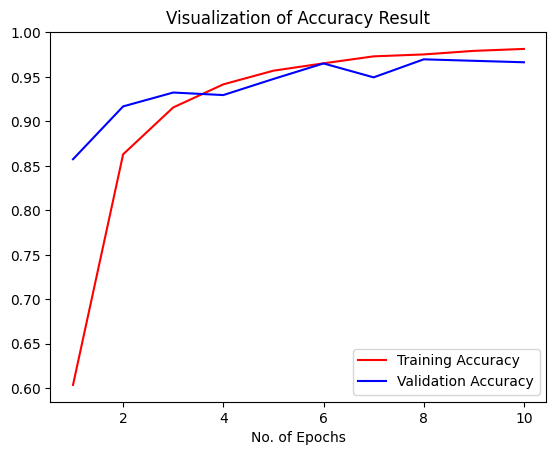

In [26]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [45]:
class_name = validation_set.class_names

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [29]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 432s 25ms/step


In [30]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [31]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [32]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 7.1/7.1 MB 77.5 kB/s eta 0:00:00
   --------------------------------------- 302.2/302.2 kB 84.9 kB/s eta 0:00:00


In [42]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [46]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96       504
                                 Apple___Black_rot       0.99      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.98       440
                                   Apple___healthy       0.95      0.98      0.96       502
                               Blueberry___healthy       0.99      0.99      0.99       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.94      1.00      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.96      0.95       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.96      0.

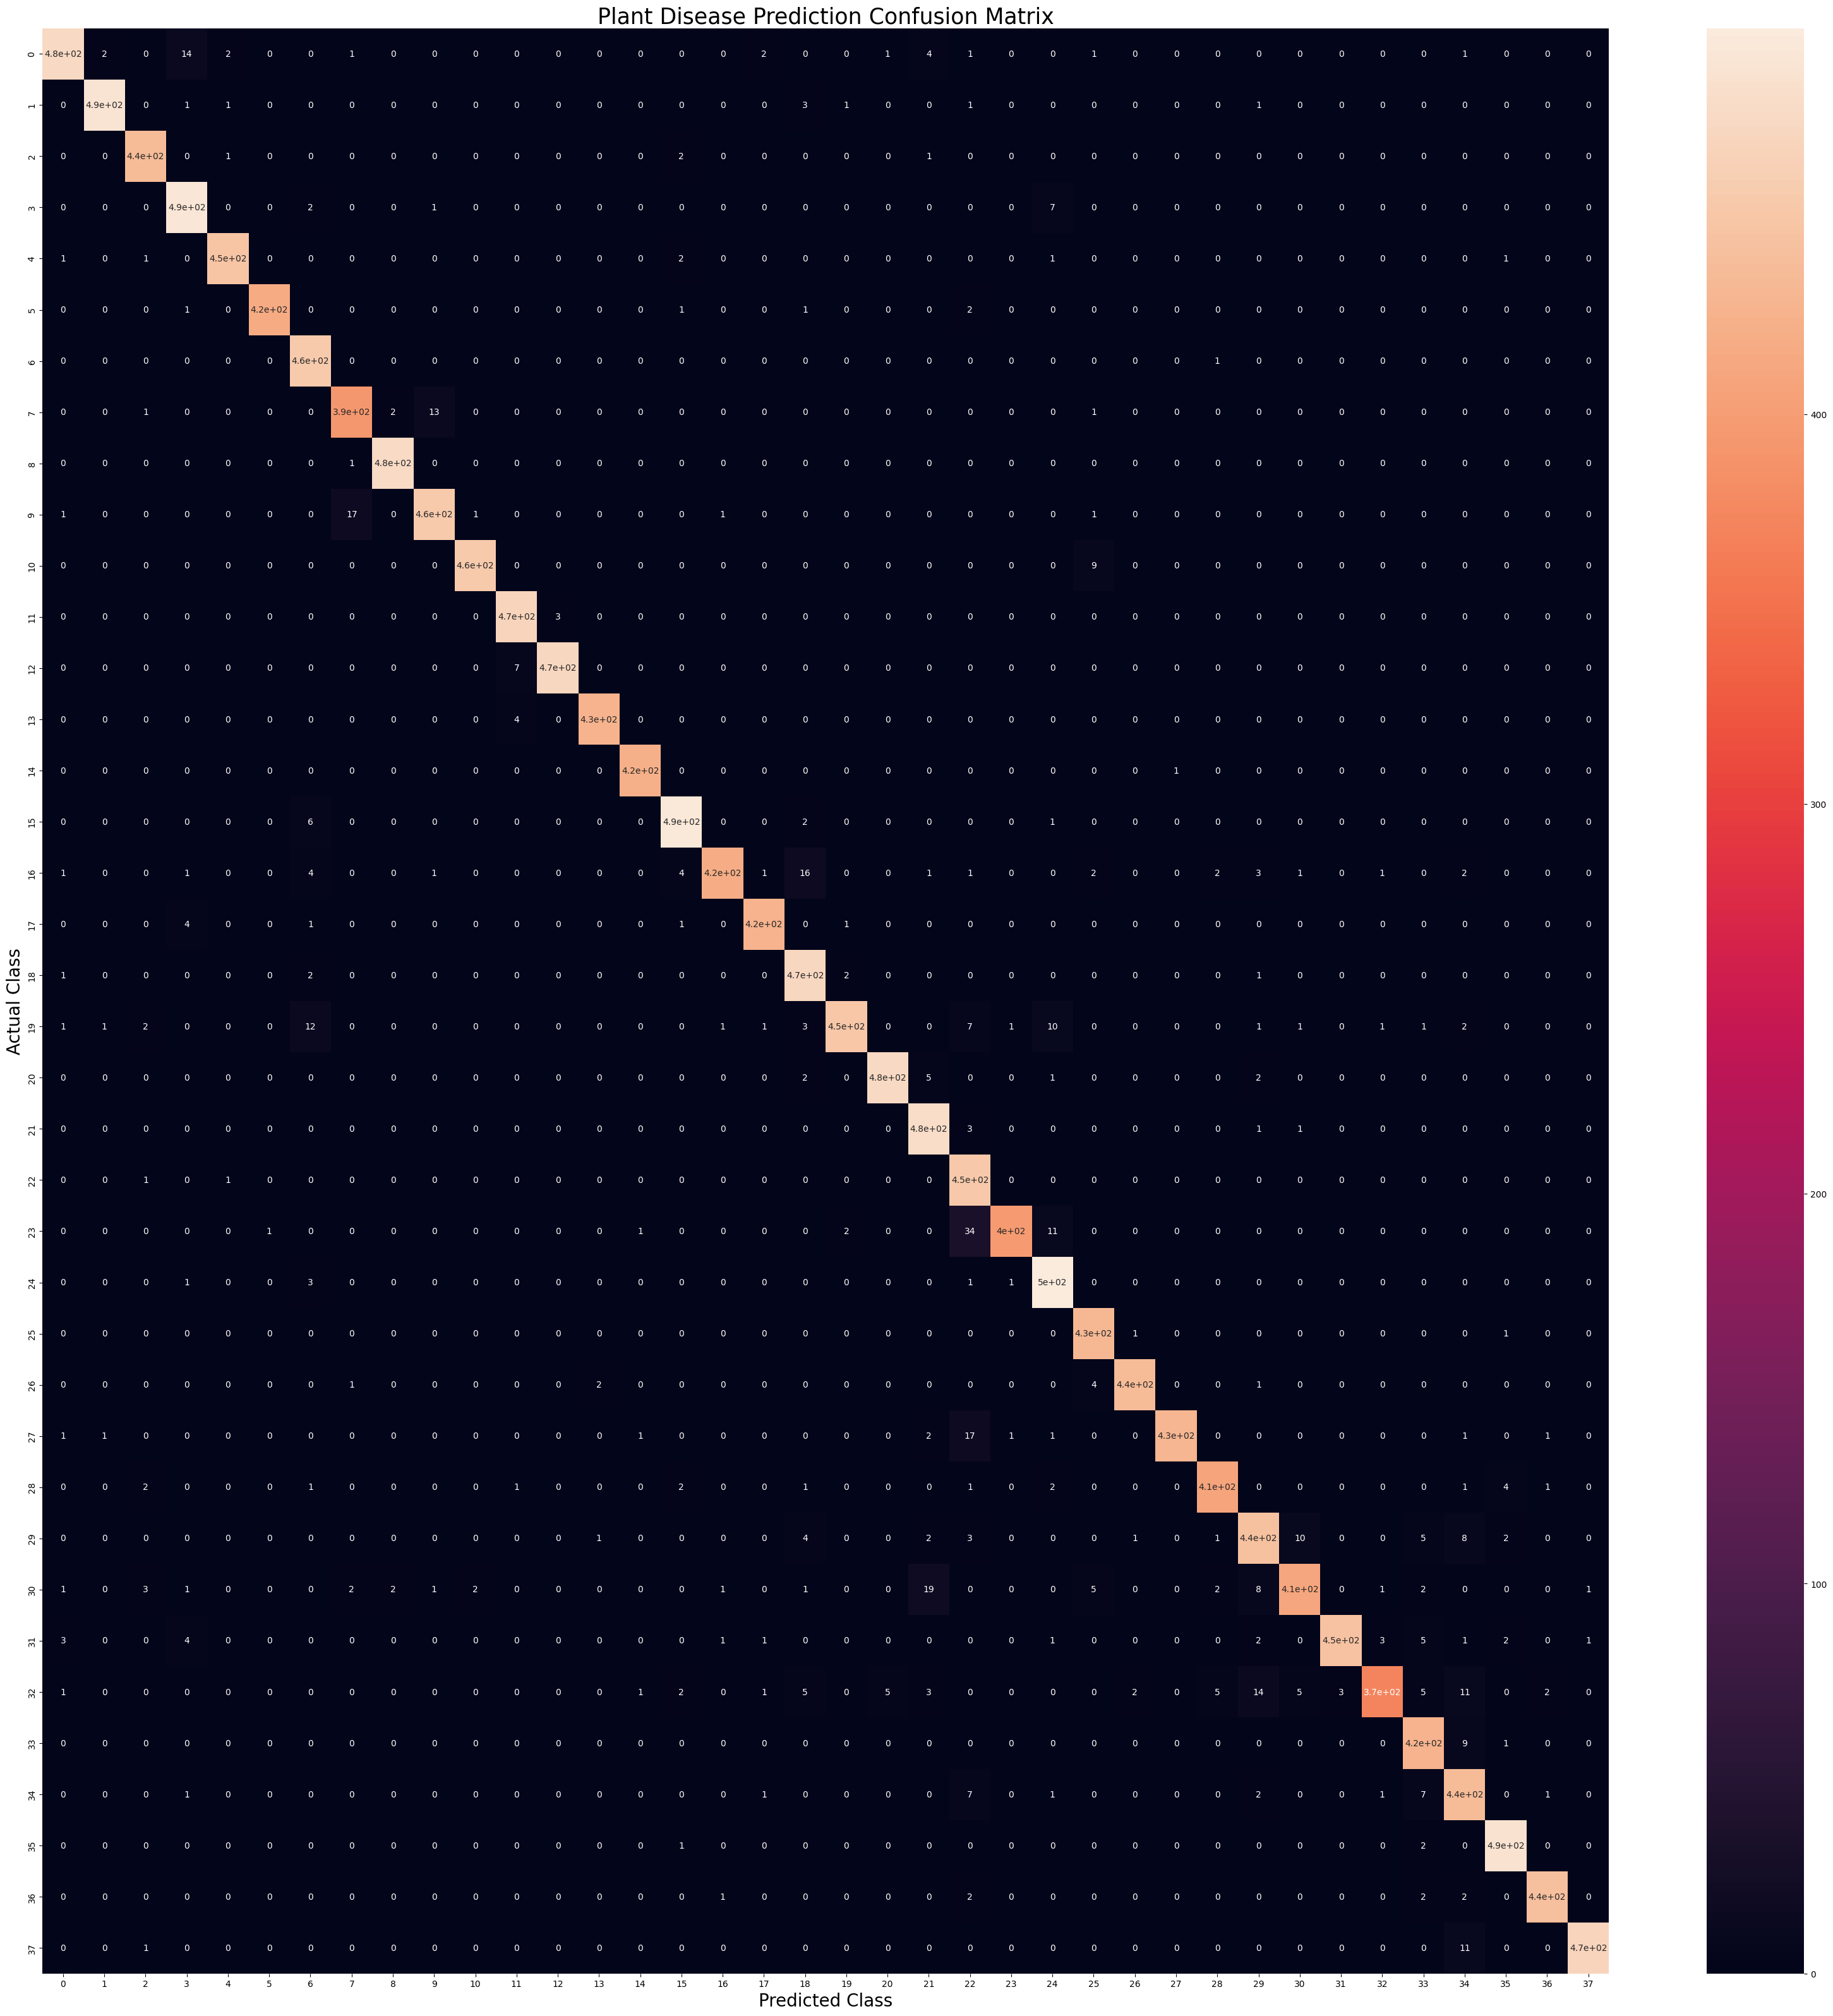

In [47]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

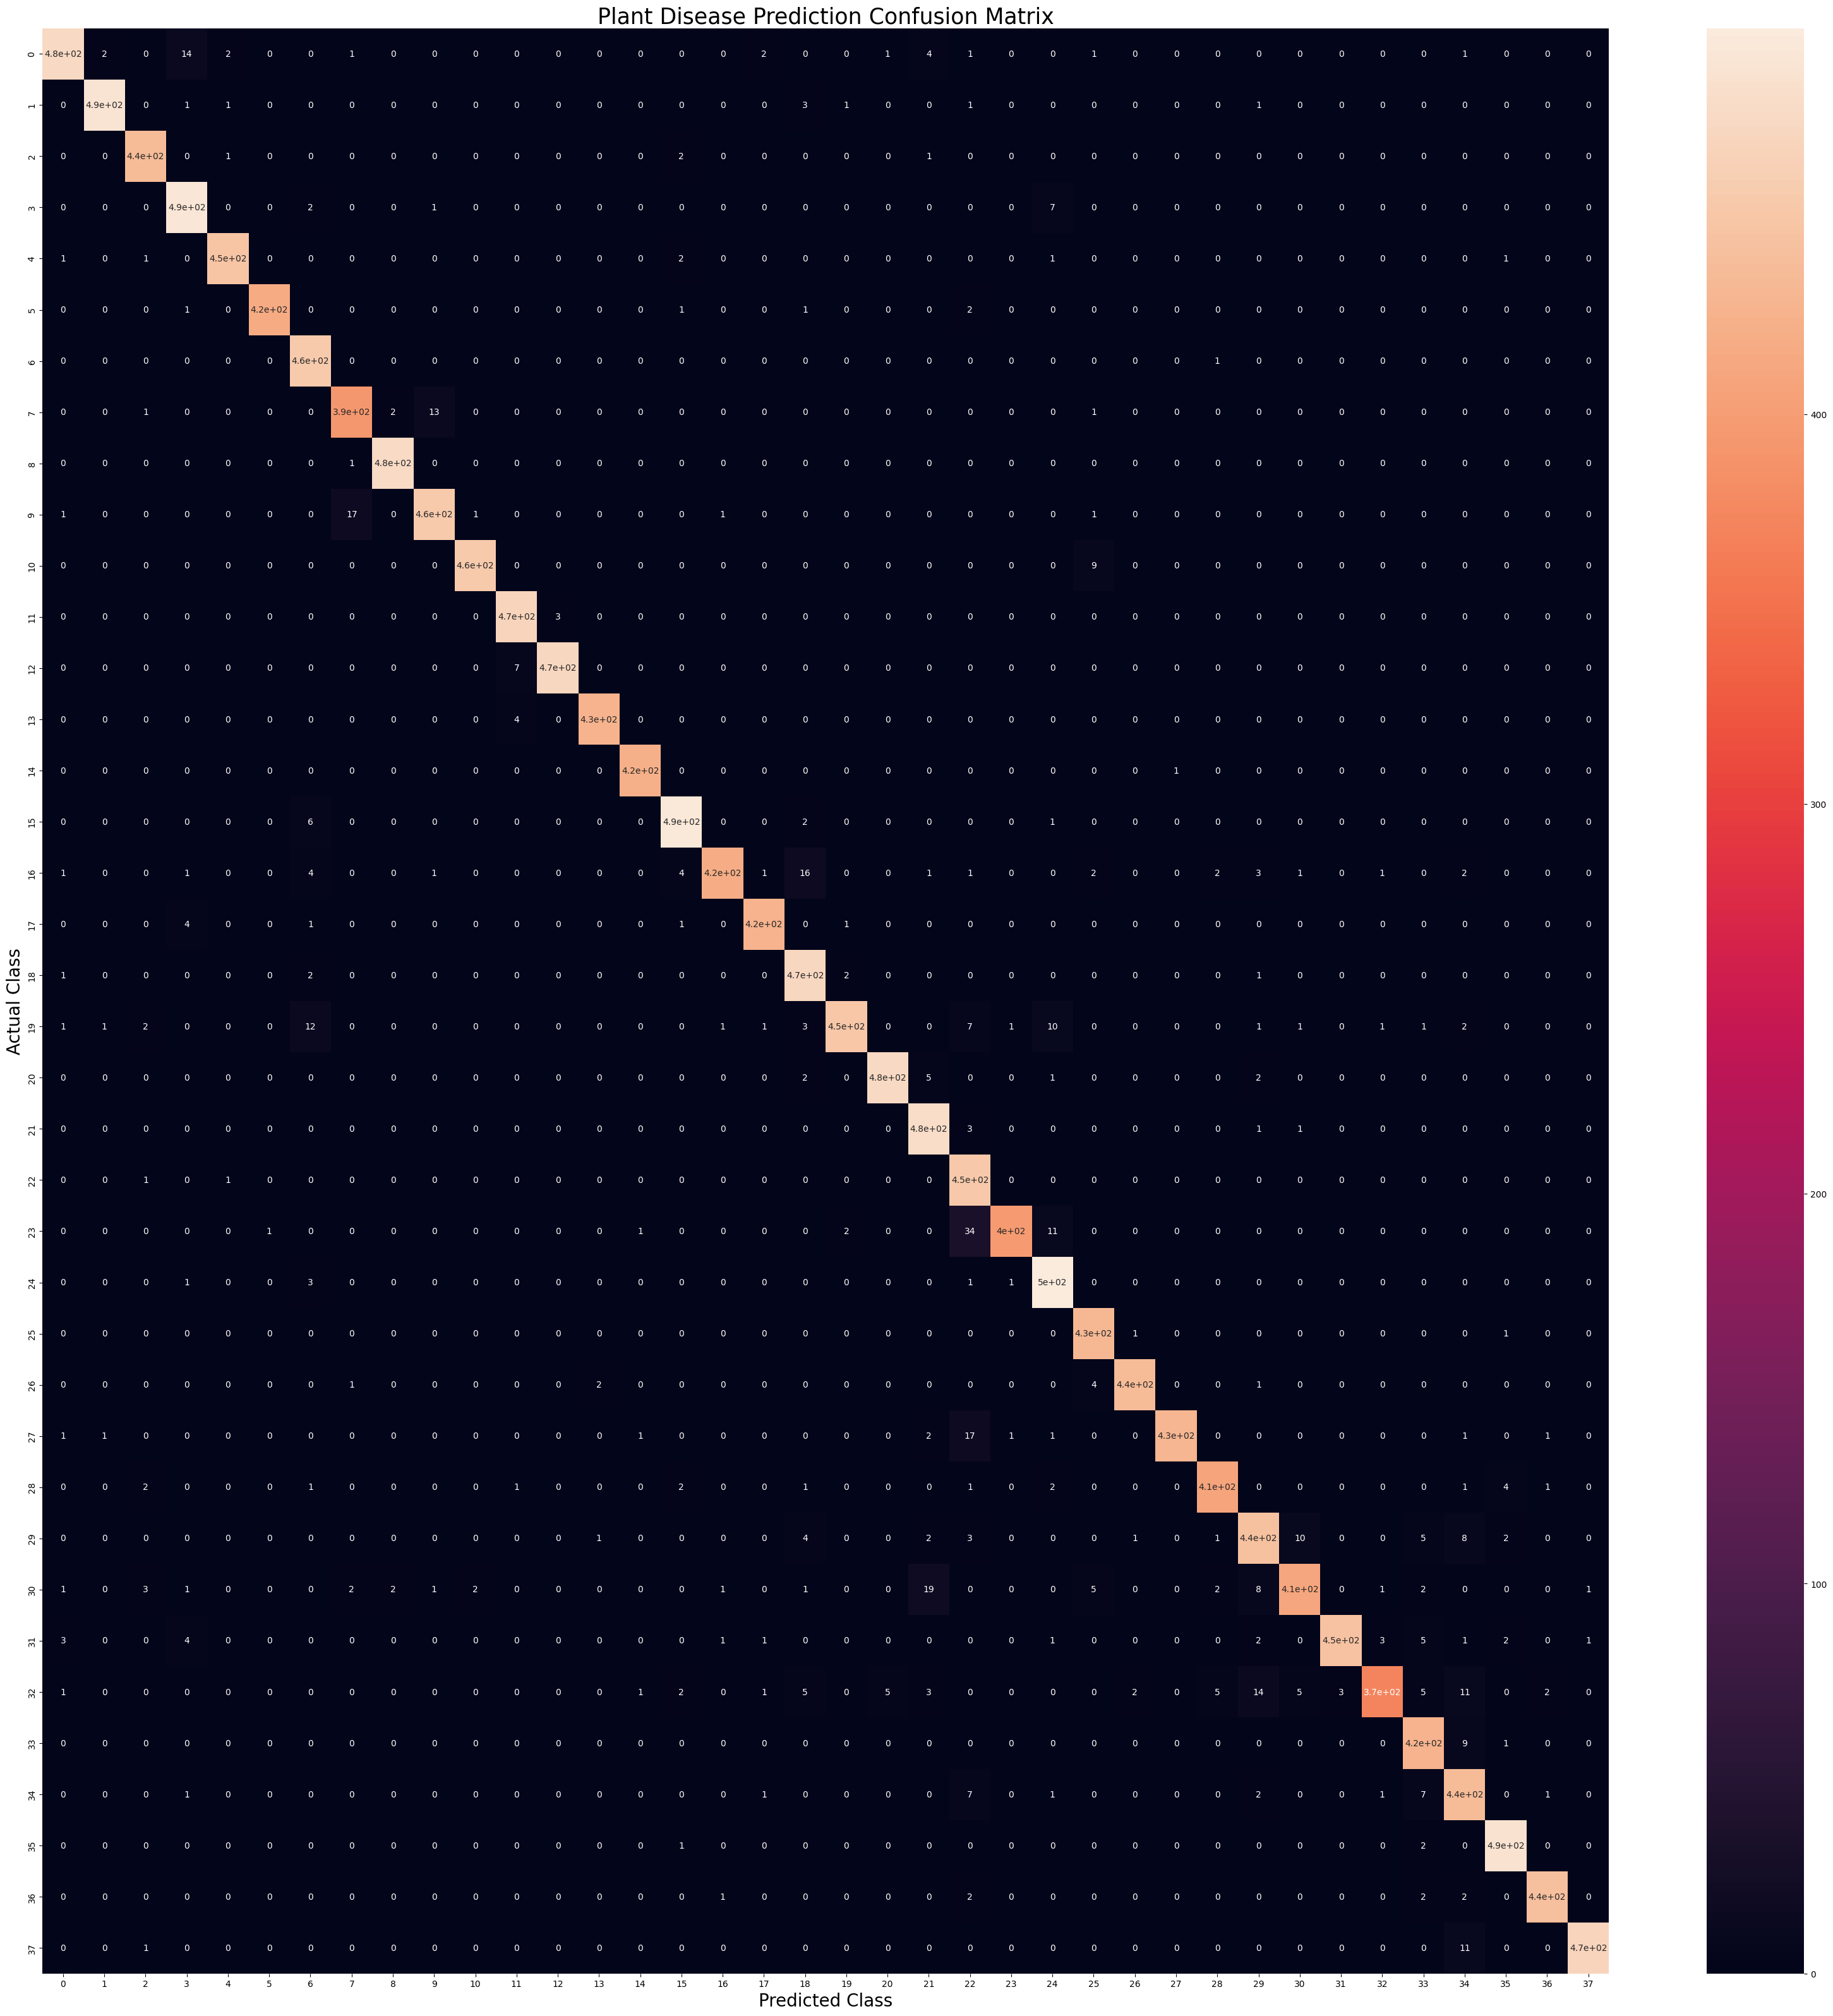

In [48]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()